In [3]:
import pyodbc

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Obtener información de columnas
    query = """
    SELECT 
        COLUMN_NAME,
        DATA_TYPE,
        CHARACTER_MAXIMUM_LENGTH,
        IS_NULLABLE
    FROM 
        INFORMATION_SCHEMA.COLUMNS
    WHERE 
        TABLE_NAME = 'COLORS';
    """
    cursor.execute(query)
    rows = cursor.fetchall()

    # Imprimir información de columnas
    for row in rows:
        print(f"Column Name: {row.COLUMN_NAME}, Data Type: {row.DATA_TYPE}, Max Length: {row.CHARACTER_MAXIMUM_LENGTH}, Nullable: {row.IS_NULLABLE}")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Column Name: id, Data Type: nchar, Max Length: 10, Nullable: YES


In [4]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla colors si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'colors')
    BEGIN
        CREATE TABLE colors (
            id INT PRIMARY KEY,
            name NVARCHAR(255),
            rgb NVARCHAR(6),
            is_trans CHAR(1)
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla colors
    with open('archive/colors.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            cursor.execute('''
                INSERT INTO colors (id, name, rgb, is_trans)
                VALUES (?, ?, ?, ?)
            ''', (fila['id'], fila['name'], fila['rgb'], fila['is_trans']))

    connection.commit()
    print("Tabla 'colors' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'colors' creada e insertados los datos exitosamente.


In [5]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla inventories si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'inventories')
    BEGIN
        CREATE TABLE inventories (
            id INT PRIMARY KEY,
            version INT,
            set_num NVARCHAR(255)
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla inventories
    with open('archive/inventories.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            cursor.execute('''
                INSERT INTO inventories (id, version, set_num)
                VALUES (?, ?, ?)
            ''', (fila['id'], fila['version'], fila['set_num']))

    connection.commit()
    print("Tabla 'inventories' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'inventories' creada e insertados los datos exitosamente.


In [6]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla inventory_parts si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'inventory_parts')
    BEGIN
        CREATE TABLE inventory_parts (
            inventory_id INT,
            part_num NVARCHAR(255),
            color_id INT,
            quantity INT,
            is_spare CHAR(1)
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla inventory_parts
    with open('archive/inventory_parts.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            cursor.execute('''
                INSERT INTO inventory_parts (inventory_id, part_num, color_id, quantity, is_spare)
                VALUES (?, ?, ?, ?, ?)
            ''', (fila['inventory_id'], fila['part_num'], fila['color_id'], fila['quantity'], fila['is_spare']))

    connection.commit()
    print("Tabla 'inventory_parts' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'inventory_parts' creada e insertados los datos exitosamente.


In [7]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla inventory_sets si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'inventory_sets')
    BEGIN
        CREATE TABLE inventory_sets (
            inventory_id INT,
            set_num NVARCHAR(255),
            quantity INT
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla inventory_sets
    with open('archive/inventory_sets.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            cursor.execute('''
                INSERT INTO inventory_sets (inventory_id, set_num, quantity)
                VALUES (?, ?, ?)
            ''', (fila['inventory_id'], fila['set_num'], fila['quantity']))

    connection.commit()
    print("Tabla 'inventory_sets' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'inventory_sets' creada e insertados los datos exitosamente.


In [8]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla part_categories si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'part_categories')
    BEGIN
        CREATE TABLE part_categories (
            id INT PRIMARY KEY,
            name NVARCHAR(255)
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla part_categories
    with open('archive/part_categories.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            cursor.execute('''
                INSERT INTO part_categories (id, name)
                VALUES (?, ?)
            ''', (fila['id'], fila['name']))

    connection.commit()
    print("Tabla 'part_categories' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'part_categories' creada e insertados los datos exitosamente.


In [9]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla parts si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'parts')
    BEGIN
        CREATE TABLE parts (
            part_num NVARCHAR(255) PRIMARY KEY,
            name NVARCHAR(255),
            part_cat_id INT,
            FOREIGN KEY (part_cat_id) REFERENCES part_categories(id)
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla parts
    with open('archive/parts.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            cursor.execute('''
                INSERT INTO parts (part_num, name, part_cat_id)
                VALUES (?, ?, ?)
            ''', (fila['part_num'], fila['name'], fila['part_cat_id']))

    connection.commit()
    print("Tabla 'parts' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'parts' creada e insertados los datos exitosamente.


In [10]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla sets si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'sets')
    BEGIN
        CREATE TABLE sets (
            set_num NVARCHAR(255) PRIMARY KEY,
            name NVARCHAR(255),
            year INT,
            theme_id INT,
            num_parts INT
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla sets
    with open('archive/sets.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            cursor.execute('''
                INSERT INTO sets (set_num, name, year, theme_id, num_parts)
                VALUES (?, ?, ?, ?, ?)
            ''', (fila['set_num'], fila['name'], fila['year'], fila['theme_id'], fila['num_parts']))

    connection.commit()
    print("Tabla 'sets' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'sets' creada e insertados los datos exitosamente.


In [11]:
import pyodbc
import csv

# Datos de conexión
server = 'LAPTOP-GU1BP2UT'
database = 'Legos'
username = ''
password = ''

# Cadena de conexión
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'

try:
    # Conectar a la base de datos
    connection = pyodbc.connect(connection_string)
    cursor = connection.cursor()

    # Crear la tabla themes si no existe
    query_create_table = '''
    IF NOT EXISTS (SELECT 1 FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_NAME = 'themes')
    BEGIN
        CREATE TABLE themes (
            id INT PRIMARY KEY,
            name NVARCHAR(255),
            parent_id INT,
            FOREIGN KEY (parent_id) REFERENCES themes(id)
        );
    END;
    '''
    cursor.execute(query_create_table)
    connection.commit()

    # Leer datos desde el archivo CSV e insertarlos en la tabla themes
    with open('archive/themes.csv', 'r', encoding='utf-8') as archivo_csv:
        lector_csv = csv.DictReader(archivo_csv)
        for fila in lector_csv:
            # Convertir cadena vacía a None para parent_id
            parent_id = int(fila['parent_id']) if fila['parent_id'].strip() else None
            cursor.execute('''
                INSERT INTO themes (id, name, parent_id)
                VALUES (?, ?, ?)
            ''', (fila['id'], fila['name'], parent_id))

    connection.commit()
    print("Tabla 'themes' creada e insertados los datos exitosamente.")

except pyodbc.Error as ex:
    print("Ocurrió un error durante la conexión o consulta:")
    print(ex)

finally:
    # Cerrar la conexión
    if 'connection' in locals():
        cursor.close()
        connection.close()


Tabla 'themes' creada e insertados los datos exitosamente.


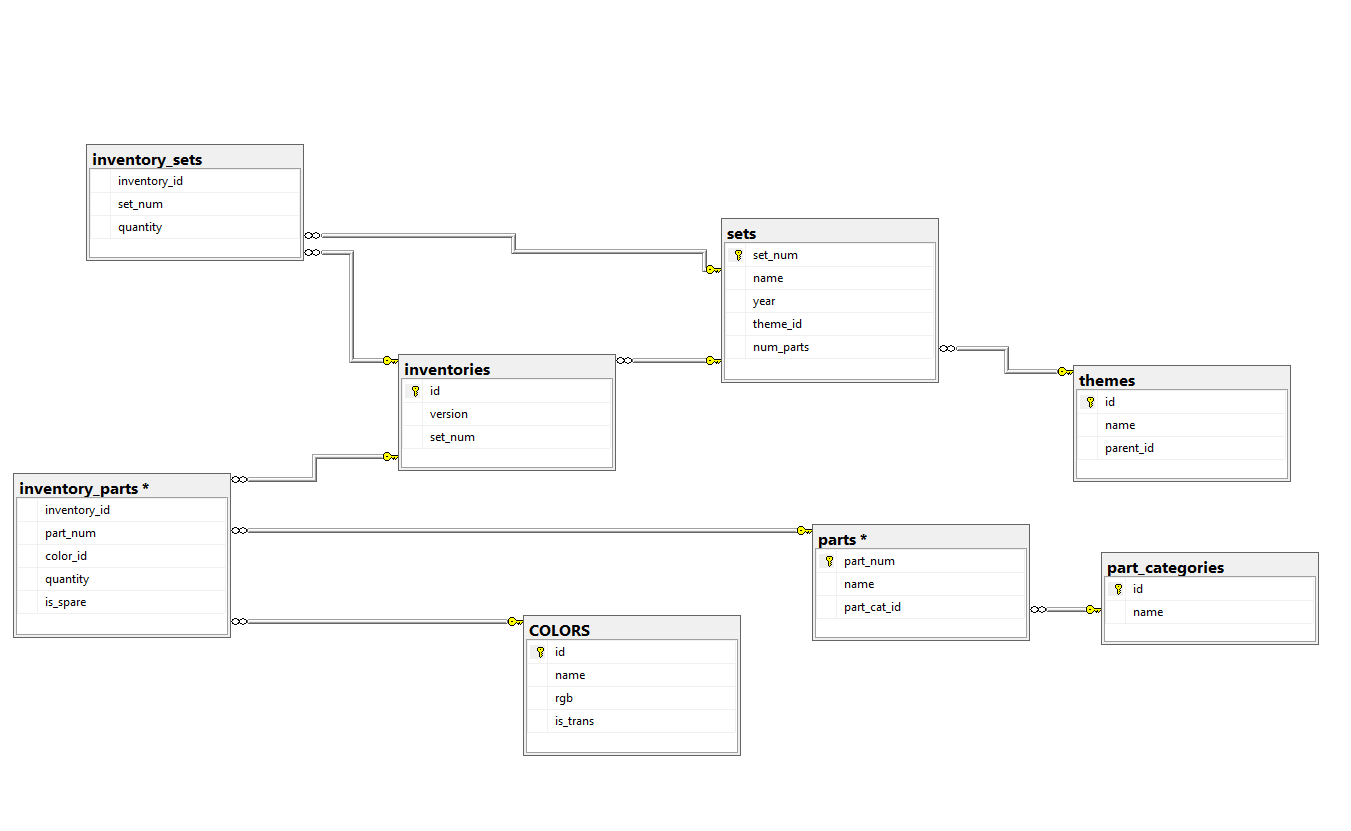